Technology


<AxesSubplot:xlabel='Date'>

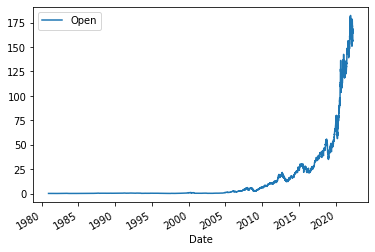

In [15]:
import yfinance as yf
import pandas as pandas

# using ticker module to create an object that will let us access functions to extract data
apple = yf.Ticker('AAPL')

# using the attribute info to extract information about the stock as python dictionary
apple_info = apple.info
# apple
apple_info['country']
print(apple_info['sector'])

# Extracting share price

apple_share_price = apple.history(period='max')
apple_share_price.head()
apple_share_price.reset_index(inplace=True)
# apple_share_price

# Creating a plot for Opena against Date
apple_share_price.plot(x="Date", y="Open")

<AxesSubplot:xlabel='Date'>

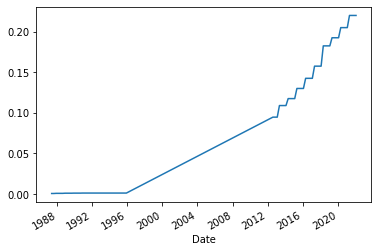

In [16]:
# type(apple_share_price)

# Extracting dividends
apple_dividends = apple.dividends
# type(apple_dividends)

apple_dividends.plot() # plotting the dividends over time

In [17]:
# Creating a ticker object for AMD
amd = yf.Ticker('AMD')

amd_info = amd.info # getting information on the amd object

amd_info['country'] 
amd_info['sector'] 

amd_share_data = amd.history(period='max')
amd_share_data.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.0,3.302083,3.1250,3.145833,219600,0,0.0
1980-03-18,0.0,3.125000,2.9375,3.031250,727200,0,0.0


In [11]:
import pandas as pd
import requests
import html5lib
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

# Dowloading the website HTML contents
data = requests.get(url).text

# Using BeautifulSoup to parse the HTML structure
soup = BeautifulSoup(data, 'html5lib')

netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high,
                                        "Low":low, "Close":close, "Adj Close":adj_close, 
                                        "Volume":volume}, ignore_index=True)  
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [19]:
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

# creating a html string object using pandas 
pandas_html = pd.read_html(url)

netflix_df = pandas_html[0]
netflix_df.head()



,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [34]:

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"
html_data = requests.get(url).text

# Creating a beautiful soup object
soup_object = BeautifulSoup(html_data, "html5lib")
# print(soup_object.prettify())
# Getting content of the title attribute
title = soup_object.title.text
# print(soup_object.prettify())

# Creating a dataframe with variables name
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup_object.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, 
                                    "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)


for x in soup_object.find_all("tr"):
    print(x)
    print('--------')
    print('--------')
    print('--------')
amazon_data.head()

IndexError: list index out of range